# __EDA notebook: Capstone ane.energy__

---
---

## __Basics__

---

### __Import libraries and tools__

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

---

### __Load datasets__

In [2]:
ohr_solar=pd.read_csv("../data/onlinehochrechnung_solar_mw.csv")

In [3]:
ohr_woff=pd.read_csv("../data/onlinehochrechnung_windoffshore_mw.csv", sep='///')

In [4]:
ohr_won=pd.read_csv("../data/onlinehochrechnung_windonshore_mw.csv", header=None)

In [5]:
speedy=pd.read_csv('../data/einspeisedaten_gen_wind_speed.csv')

In [6]:
regel_results=pd.read_csv('../data/regelleistung_aggr_results.csv')

In [7]:
regel_demand=pd.read_csv('../data/regelleistung_demand.csv')

---
---

## __Overview over datasets__

---

### __Solar dataset__

In [9]:
ohr_solar.head()

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv
0,2011-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0
1,2012-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2,2012-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
3,2012-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
4,2012-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0


In [10]:
ohr_solar['dt_start_utc'].min()

'2011-12-31 23:00:00'

In [11]:
ohr_solar['dt_start_utc'].max()

'2021-07-11 21:00:00'

In [12]:
ohr_solar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fiftyhertz,83519.0,1050.984036,1720.459702,-250.0,0.0,33.29,1527.775,10438.0300
tennet,83519.0,1591.799313,2489.054845,0.0,0.0,46.18,2475.400,13366.4700
amprion,83519.0,976.507596,1527.052842,0.0,0.0,28.49,1515.805,8126.1400
transnetbw,83519.0,605.147519,956.694446,0.0,0.0,13.75,911.000,4889.8678
nrv,83519.0,4224.438461,6571.637631,-250.0,0.0,141.15,6631.440,36306.7608


In [13]:
ohr_solar.shape

(83519, 6)

In [14]:
ohr_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83519 entries, 0 to 83518
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt_start_utc  83519 non-null  object 
 1   fiftyhertz    83519 non-null  float64
 2   tennet        83519 non-null  float64
 3   amprion       83519 non-null  float64
 4   transnetbw    83519 non-null  float64
 5   nrv           83519 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.8+ MB


---

#### __Check for null and nan values__

In [15]:
ohr_solar.isnull().sum()

dt_start_utc    0
fiftyhertz      0
tennet          0
amprion         0
transnetbw      0
nrv             0
dtype: int64

In [16]:
ohr_solar.isna().sum()

dt_start_utc    0
fiftyhertz      0
tennet          0
amprion         0
transnetbw      0
nrv             0
dtype: int64

---

#### __Get an understanding of the columns__

In [17]:
ohr_solar.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'amprion', 'transnetbw', 'nrv'], dtype='object')

In [ ]:
sns.pairplot(ohr_solar)

---

### __Onshore dataset__

In [8]:
ohr_won.head()

,0,1,2,3,4,5
0,2011-12-31 23:00:00,1271.8,1582.70,1542.03,262.10,4658.63
1,2012-01-01 00:00:00,1358.8,1816.21,1548.25,216.23,4939.49
2,2012-01-01 01:00:00,1339.2,2312.11,1650.40,157.80,5459.51
3,2012-01-01 02:00:00,1436.2,2881.49,1642.62,195.34,6155.65
4,2012-01-01 03:00:00,1707.8,3162.34,1709.99,225.16,6805.30


In [9]:
ohr_won[0].min()

'2011-12-31 23:00:00'

In [ ]:
ohr_won[0].max()

In [19]:
ohr_won.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1,83279.0,3185.409040,3136.063750,-7.13,883.030,2113.89,4476.620,17148.24
2,83279.0,3847.237231,3644.082790,-180.65,1185.970,2652.88,5320.690,20572.94
3,83279.0,1628.170237,1753.307424,0.00,408.735,980.75,2186.125,9983.00
4,83279.0,201.736594,277.085107,0.00,25.145,84.56,258.320,1555.50
5,83279.0,8862.553114,8278.017439,28.50,2956.700,6146.80,11949.415,48106.83


In [ ]:
ohr_won.shape

In [ ]:
ohr_won.info()

---

#### __Check for nan and null values__

In [20]:
ohr_won.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [21]:
ohr_won.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

---

#### __Get an understanding of the columns__

In [22]:
ohr_won.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
sns.pairplot(ohr_won)

---

### __Offshore dataset__

In [10]:
ohr_woff.head(20)

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv//
0,2012-12-31 23:00:00,48.00,136.05,NaN,NaN,184.05
1,2013-01-01 00:00:00,48.00,119.93,NaN,NaN,167.93
2,2013-01-01 01:00:00,48.00,83.69,NaN,NaN,131.69
3,2013-01-01 02:00:00,48.00,49.24,NaN,NaN,97.24
4,2013-01-01 03:00:00,48.00,40.35,NaN,NaN,88.35
5,2013-01-01 04:00:00,48.00,21.78,NaN,NaN,69.78
6,2013-01-01 05:00:00,48.00,16.55,NaN,NaN,64.55
7,2013-01-01 06:00:00,48.00,20.31,NaN,NaN,68.31
8,2013-01-01 07:00:00,48.00,24.72,NaN,NaN,72.72
9,2013-01-01 08:00:00,48.00,59.69,NaN,NaN,107.69


In [ ]:
ohr_woff['dt_start_utc'].min()

In [ ]:
ohr_woff['dt_start_utc'].max()

In [ ]:
ohr_woff.describe().transpose()

In [ ]:
ohr_woff.describe

In [ ]:
ohr_woff.shape

In [ ]:
ohr_woff.info()

---

#### __Check for nan and null values__

In [24]:
ohr_woff.isna().sum()

dt_start_utc        0
fiftyhertz          0
tennet              0
amprion         74735
transnetbw      74735
nrv//               0
dtype: int64

In [25]:
ohr_woff.isnull().sum()

dt_start_utc        0
fiftyhertz          0
tennet              0
amprion         74735
transnetbw      74735
nrv//               0
dtype: int64

Delete the null and nan columns. The missing data came from 2 transmission system operators without offshore.

In [11]:
ohr_woff = ohr_woff.drop(['amprion', 'transnetbw'], axis = 1)

---

#### __Get an understanding of the columns__

In [27]:
ohr_woff.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'nrv//'], dtype='object')

In [ ]:
sns.pairplot(ohr_woff)

---

### __Wind speed__

In [28]:
speedy.head(388)

,dt_start_utc,voronoi_area_id,windspeed_ms
0,2018-12-31 23:00:00,1,9.523
1,2018-12-31 23:00:00,2,9.691
2,2018-12-31 23:00:00,4,14.258
3,2018-12-31 23:00:00,5,14.062
4,2018-12-31 23:00:00,6,11.504
...,...,...,...
383,2018-12-31 23:45:00,107,14.916
384,2018-12-31 23:45:00,109,14.125
385,2019-01-01 00:00:00,1,8.601
386,2019-01-01 00:00:00,2,9.741


* 385 values per hour of the timestemp
* 6,548,085 rows, divided by the number of a normal year = 17,008.013 rows
* 708,667 days between 31.12.2018 and 30.09.2020 
* want to create a mean or median of the 385 values of 1h to compare and merge it with the onshore, offshore and solar csv

In [ ]:
speedy.head()

In [29]:
speedy['dt_start_utc'].max()

'2020-09-30 23:45:00'

In [ ]:
speedy['dt_start_utc'].min()

In [ ]:
speedy.describe().transpose()

In [30]:
speedy.isna().sum()

dt_start_utc       0
voronoi_area_id    0
windspeed_ms       0
dtype: int64

In [ ]:
speedy.info

In [12]:
speedy['dt_start_utc']=pd.to_datetime(speedy['dt_start_utc'])

In [13]:
speedy = speedy.set_index('dt_start_utc')

In [14]:
# aggregate data on hourly timesteps and interpolate missing values
def fill_missing(data):
    data = data.resample('1H').median()
    data = data.interpolate(method='time', limit_direction='both')
    return data

In [15]:
speedy_filled = fill_missing(speedy)

In [38]:
speedy_filled.head()

,voronoi_area_id,windspeed_ms
dt_start_utc,,
2018-12-31 23:00:00,57.0,13.1590
2019-01-01 00:00:00,55.5,13.7925
2019-01-01 01:00:00,55.0,14.3600
2019-01-01 02:00:00,55.0,15.0180
2019-01-01 03:00:00,55.0,14.8220


In [39]:
speedy_filled.isna().sum()

voronoi_area_id    0
windspeed_ms       0
dtype: int64

In [ ]:
speedy_filled.head(20)

In [ ]:
speedy.tail()

In [ ]:
speedy.shape

In [ ]:
speedy.isnull().sum()

In [ ]:
speedy.isna().sum()

In [ ]:
speedy.describe().transpose()

In [ ]:
speedy.head()

---

### __Regelleistung aggregated results__

In [40]:
regel_results.head()

,date_start,date_end,product,reserve_type,total_min_capacity_price_eur_mw,total_average_capacity_price_eur_mw,total_marginal_capacity_price_eur_mw,total_min_energy_price_eur_mwh,total_average_energy_price_eur_mwh,total_marginal_energy_price_eur_mwh,germany_min_capacity_price_eur_mw,germany_average_capacity_price_eur_mw,germany_marginal_capacity_price_eur_mw,germany_min_energy_price_eur_mwh,germany_average_energy_price_eur_mwh,germany_marginal_energy_price_eur_mwh,germany_import_export_mw
0,2019-01-01,2019-01-01,NEG_00_04,MRL,0.0,150.81,872.262,1.000,-371.64,-18422.000,0.0,150.81,872.262,1.000,-371.64,-18422.000,0
1,2019-01-01,2019-01-01,NEG_00_04,SRL,0.0,88.82,146.420,11.000,-79.74,-449.659,0.0,88.82,146.420,11.000,-79.74,-449.659,0
2,2019-01-01,2019-01-01,NEG_04_08,MRL,0.0,72.12,236.842,52.278,-179.30,-4989.000,0.0,72.12,236.842,52.278,-179.30,-4989.000,0
3,2019-01-01,2019-01-01,NEG_04_08,SRL,0.0,86.05,160.760,11.000,-79.87,-500.000,0.0,86.05,160.760,11.000,-79.87,-500.000,0
4,2019-01-01,2019-01-01,NEG_08_12,MRL,0.0,14.76,70.000,1.000,-264.63,-2470.000,0.0,14.76,70.000,1.000,-264.63,-2470.000,0


In [ ]:
regel_results.info()

In [ ]:
regel_results.shape

In [ ]:
regel_results.isna().sum()

In [41]:
regel_results.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_min_capacity_price_eur_mw,16068.0,0.357014,1.586713,0.0,0.0000,0.000,0.0000,31.87
total_average_capacity_price_eur_mw,16068.0,11.983400,60.308900,0.0,0.5800,4.410,11.7800,5375.26
total_marginal_capacity_price_eur_mw,16068.0,36.466545,891.231948,0.0,2.0000,8.138,18.4000,99900.00
total_min_energy_price_eur_mwh,15828.0,37.125926,48.575562,-55.0,11.5650,36.000,60.0000,3500.00
total_average_energy_price_eur_mwh,15828.0,49.157829,2040.750022,-47880.0,-411.3975,40.700,654.2975,32466.80
total_marginal_energy_price_eur_mwh,15828.0,1005.782543,29970.177707,-99999.0,-1940.0000,30.050,9848.0000,99999.00
germany_min_capacity_price_eur_mw,16068.0,0.399128,1.774616,0.0,0.0000,0.000,0.0000,31.87
germany_average_capacity_price_eur_mw,16068.0,12.095214,60.416618,0.0,0.5900,4.460,11.8800,5375.26
germany_marginal_capacity_price_eur_mw,16068.0,36.433738,891.232577,0.0,2.0000,8.110,18.3600,99900.00
germany_min_energy_price_eur_mwh,15828.0,36.924757,42.628876,-55.0,11.0000,36.000,60.0075,3500.00


In [ ]:
regel_results.corr()

In [ ]:
regel_results.min()

In [ ]:
regel_results.max()

---

#### __Handle Nan, null values and missing data__

In [42]:
def fill_missing(data):
    data = data.resample('1H').median()
    data = data.interpolate(method='time', limit_direction='both')
    return data

In [43]:
#converting ‘dt_start_utc’ to datetime format and seting as index
regel_results['date_end'] = pd.to_datetime(regel_results['date_end'])
regel_results = regel_results.set_index('date_end')

In [ ]:
regel_results.head()

In [ ]:
regel_results_filled=fill_missing(regel_results)

In [ ]:
regel_results_filled['weekday']=regel_results_filled.index.dayofweek

In [ ]:
regel_results_filled['date']=regel_results_filled.index.date

In [ ]:
regel_results_filled.head()

In [ ]:
regel_results_filled.isna().sum()

---

### __Regelleistung Demands__

In [ ]:
regel_demand.head()

In [ ]:
regel_demand.describe().transpose()

In [ ]:
regel_demand.isna().sum()

In [ ]:
regel_demand.info()

In [ ]:
regel_demand.shape

In [ ]:
regel_demand.max()

In [ ]:
regel_demand.min()

In [ ]:
regel_demand.corr()

---

## __Columns of the datasets__

In [16]:
ohr_solar.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'amprion', 'transnetbw', 'nrv'], dtype='object')

In [17]:
ohr_woff.columns

Index(['dt_start_utc', 'fiftyhertz', 'tennet', 'nrv//'], dtype='object')

In [18]:
ohr_solar['dt_start_utc']=pd.to_datetime(ohr_solar['dt_start_utc'])

In [19]:
ohr_solar = ohr_solar.set_index('dt_start_utc')

In [20]:
ohr_woff['dt_start_utc']=pd.to_datetime(ohr_woff['dt_start_utc'])

In [21]:
ohr_woff = ohr_woff.set_index('dt_start_utc')

---

#### __Rename the last column in the Offshore dataset and delete //__

In [22]:
#ohr_woff=ohr_woff.rename(columns={'nrv//': 'nrv'})
ohr_woff=ohr_woff.rename(columns={'nrv//':'nrv' })

In [67]:
ohr_woff.head()

,fiftyhertz,tennet,nrv
dt_start_utc,,,
2012-12-31 23:00:00,48.0,136.05,184.05
2013-01-01 00:00:00,48.0,119.93,167.93
2013-01-01 01:00:00,48.0,83.69,131.69
2013-01-01 02:00:00,48.0,49.24,97.24
2013-01-01 03:00:00,48.0,40.35,88.35


---

#### __Rename the unnamed columns in the Onshore dataset__

In [62]:
ohr_won.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [23]:
ohr_won=ohr_won.rename(columns={ohr_won.columns[0]: 'dt_start_utc', ohr_won.columns[1]: 'fiftyhertz', ohr_won.columns[2]:'tennet', ohr_won.columns[3]:'amprion', ohr_won.columns[4]:'transnetbw', ohr_won.columns[5]:'nrv' })

In [64]:
ohr_won.head()

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv
0,2011-12-31 23:00:00,1271.8,1582.70,1542.03,262.10,4658.63
1,2012-01-01 00:00:00,1358.8,1816.21,1548.25,216.23,4939.49
2,2012-01-01 01:00:00,1339.2,2312.11,1650.40,157.80,5459.51
3,2012-01-01 02:00:00,1436.2,2881.49,1642.62,195.34,6155.65
4,2012-01-01 03:00:00,1707.8,3162.34,1709.99,225.16,6805.30


---

### __Get an understanding of the column names meaning__

---

#### __Amprion__ 

* __one of four transmission system operators in Germany__
* __extra-high-voltage network is 11,000 km long__ and transports electricity across an area that extends from Lower Saxony to the Alps. 
* __Around a third of Germany’s economic output is generated there__. 
* Also performs overarching operations for integrated grid systems in Germany and Europe
* 2 offshore wind farms: DOLWIN4 and BORWIN4 - operation start 2028

    https://www.amprion.net/

##### __Market Platform__

* Grid Losses
* Reserve Power Plants 
* Control Energy
* Interruptible Loads 

---

#### __TenneT__ 

* __one of four transmission system operators in Germany and the Netherlands__
* 27,000 high voltage pylons
* __24,000 km high-voltage network__
* 99.9999% grid availability
* Onshore and Offshore projects
* 14 total connected offshore wind farms
* 16 interconnections
* 42,000,000 end users

    https://www.tennet.eu/#&panel1-1

---

#### __Transnet BW__

* __one of four transmission system operators in Germany__: Baden-Württemberg but ensure that electricity is supplied to the region, Germany and throughout Europe
* former part of EnBW, spun off to separate company due to the European Commission's requirements for the liberalisation of the energy market
* __power grid lines of 3,200 km__
* 11,000,000 end users
* cooperation with Amprion for the __Ultranet__ grid expansion project
* cooperation with TenneT: planning and implementing __SuedLink__ wind power line (700 km, largest infrastructure project, north-south connection)



    https://www.transnetbw.de/de

##### __Link to infeed:__ 

* https://www.transnetbw.com/en/transparency/market-data/key-figures

---

#### __50Hertz__

* 50Hertz Transmission is __one of four transmission system operators in Northern and Eastern Germany__
* __power grid lines of 10,380 km__
* 18,000,000 end users
* 50Hertz is a forerunner in the field of secure integration of renewable energy: in our grid area, more than 60 percent of the electricity consumed is already generated from renewable sources – until 2032 we want to integrate 100 percent securely. 
* 2 Offshore Wind parks: Ostwind 2 (GER), Arcadis Ost 1 (Belgian Wind Park Operator Parkwind)
* Connect Arcadis Ost 1 and Baltic Eagle (both Baltic Sea)- installation of third cable system planned for 2022

---

#### __NRV NetzRegelVerbund__

* Grid Control Cooperation: innovative network control concept, by means of which the four German transmission system operators (TSOs) optimise their control energy use and the control reserve provision technically and economically through an intelligent communication between the load-frequency controllers of the TSOs
* TSOs: 50Hertz, Amprion, TenneT, Transnet BW

* https://www.regelleistung.net/apps/datacenter/activated-values/?cooperation=NRV&qualities=OPERATIONAL&qualities=ASSURED&seriesGroups=HIJQag%2BgIgohCCMAKEkBUCMBWAskA

---

#### __SRL = SekundärRegelLeistung__

Auch die Sekundärregelung hat die Aufgabe, das Gleichgewicht zwischen physikalischem Stromangebot und -nachfrage nach dem Auftreten einer Differenz wiederherzustellen. Im Gegensatz zur Primärregelung wird hier nur die Situation in der jeweiligen Regelzone inklusive des Stromaustausches mit anderen Regelzonen betrachtet. Dafür werden die geplanten mit den tatsächlichen Leistungsflüssen zu anderen Regelzonen verglichen und ausgeregelt. Es muss sichergestellt sein, dass die Sekundär- und Primärregelung immer in die gleiche Richtung arbeiten, was durch eine Überwachung der Netzfrequenz sichergestellt wird. Primär- und Sekundärregelung können zeitgleich starten, der sekundäre Regelvorgang sollte entsprechend den Vorgaben des Netzregelverbundes nach spätestens 15 Minuten den primären Regelvorgang abgelöst haben, so dass die Primärregelung wieder zur Verfügung steht.

Die Höhe der sekundär zur Verfügung gestellten Leistung hängt zum einen von der Netzkennzahl und der Frequenzabweichung ab, zum anderen von der Differenz aus den tatsächlichen Austauschleistungen zu Nachbarnetzen und den als Fahrplan deklarierten Austauschleistungen. Der Abruf der Sekundärregelleistung erfolgt automatisiert, dazu sind die entsprechenden Erzeugungseinheiten leittechnisch mit dem Übertragungsnetzbetreiber verbunden. Erzeugereinheiten, die Sekundärregelleistung bereitstellen, müssen dabei besondere Anforderungen erfüllen. Die gesamte Regelleistung muss innerhalb von höchstens 5 Minuten erbracht werden können, die Laständerungsgeschwindigkeit muss dabei mindestens 2 % der Nennleistung pro Minute betragen. Zum Einsatz kommen dabei zum Beispiel Pumpspeicherkraftwerke oder auch konventionelle GuD- oder Steinkohlekraftwerke.

---

#### __MRL = MinutenReserveLeistung (Tertiärregelung)__

Auch bei der Tertiärregelung (Minutenreserve) wird zwischen negativer und positiver Regelenergie unterschieden, sie dient primär der wirtschaftlichen Optimierung. Früher wurde die Minutenreserve vom Übertragungsnetzbetreiber beim Lieferanten telefonisch angefordert.

Seit 3. Juli 2012 wird die Minutenreserve automatisch vom Merit-Order-List-Server (MOLS) abgerufen.

Die vorgehaltene Minutenreserveleistung muss innerhalb von 15 Minuten vollständig erbracht werden können, zum Einsatz kommen dabei konventionelle Kraftwerke oder andere Erzeugereinheiten, sowie regelbare Lasten. 

Als regelbare Lasten werden zum Beispiel Lichtbogenöfen in Stahlwerken oder Nachtspeicherheizungen verwendet.

__Für die negative Minutenreserve stehen zwei Möglichkeiten zur Verfügung:__

* Die Aktivierung zusätzlicher Lasten im Netz in Form von Pumpspeicherkraftwerken.
* Das teilweise oder komplette Herunterfahren von Kraftwerken. Neben der Drosselung von Großkraftwerken kann negative Regelleistung auch durch kollektives Abschalten von Blockheizkraftwerken (BHKW-Anlagen) in Form eines virtuellen Kraftwerks bereitgestellt werden. Dabei sind solche BHKW-Anlagen besonders geeignet, deren Wärmelieferung nicht kontinuierlich gewährleistet sein muss. Jedoch darf deren eingespeister Strom nicht nach EEG vergütet werden, denn eine Parallelvermarktung steht derzeit dem EEG entgegen. 
* Auch durch Windkraft kann mittlerweile negative Minutenreserve bereitgestellt werden. Dafür werden Windkraftanlagen in einem virtuellen Kraftwerk mithilfe von Fernsteuerung und auf Basis meteorologischer Daten, den Erzeugungsleistungen der Anlagen und der jeweiligen Signale der Netzbetreiber dem Bedarf entsprechend heruntergeregelt.

---

#### __RZ = Regelzone__

---

#### __Imbalance energy price__

The imbalance price, also known as reBAP (uniform imbalance price across control areas in Germany), determines on the balancing group side the price of the energy used to balance the system.

In [24]:
imb = pd.read_csv("../data/imbalance_de.csv", header=None)

In [ ]:
imb.tail(50)

column 1 seems to be the Imbalance (in MWh)
column 2 seems to be Imbalance Energy Price (in EUR/MWh) 

---

### __Renewables in Europe__

Windparks:

* https://www.thewindpower.net/online_access_de.php

* https://www.thewindpower.net/store_continent_de.php?id_zone=1000

Offshore: 

* http://153.97.132.92/qgiswebclient.html?map=/var/qgis-web-client/projects/wind_farm.qgs&searchtables=search_wind&lang=de&startExtent=6.4,51.3,14.5,58.3

Offshore network overview:

* https://www.erneuerbare-energien.de/EE/Navigation/DE/Technologien/Windenergie-auf-See/Offshore-Projekte/Netzanbindungen/netzanbindungen.html

---

## __Split time stemp__

In [25]:
ohr_solar['year'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.year
ohr_solar['month'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.month
ohr_solar['day'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.day
ohr_solar['hour'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.hour
ohr_solar['minute'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.minute
ohr_solar['seconds'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.second
ohr_solar['date']=pd.to_datetime(ohr_solar['dt_start_utc']).dt.date

KeyError: 'dt_start_utc'

In [26]:
ohr_woff['year'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.year
ohr_woff['month'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.month
ohr_woff['day'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.day
ohr_woff['hour'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.hour
ohr_woff['minute'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.minute
ohr_woff['seconds'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.second
ohr_woff['date']=pd.to_datetime(ohr_woff['dt_start_utc']).dt.date

KeyError: 'dt_start_utc'

In [ ]:
ohr_won['year'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.year
ohr_won['month'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.month
ohr_won['day'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.day
ohr_won['hour'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.hour
ohr_won['minute'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.minute
ohr_won['seconds'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.second
ohr_won['date']=pd.to_datetime(ohr_won['dt_start_utc']).dt.date


No solar values between 4PM and 7AM due to sun light availability in winter month. In summer between 8PM and 2AM.

In [ ]:
ohr_solar.tail(10)

In [ ]:
ohr_woff.head(10)

In [ ]:
ohr_won.head(10)

---

### __Create timestemp and split for windspeed__

In [27]:
speedy_groupby=speedy_groupby.reset_index()

NameError: name 'speedy_groupby' is not defined

In [ ]:
speedy_groupby['hours']=speedy_groupby['dt_start_utc'].dt.hour

In [ ]:
speedy_groupby.head(20)

In [ ]:
speedy_groupby['day']=speedy_groupby['dt_start_utc'].dt.to_period('D')

In [ ]:
speedy_groupby.head()

In [28]:
speedy_groupby.drop(['dt_start_utc','voronoi_area_id'], axis=1, inplace=True)

NameError: name 'speedy_groupby' is not defined

In [ ]:
speedy_groupby_hour=speedy_groupby.groupby(['day','hours']).median()

In [ ]:
speedy_groupby_hour.head(30)

In [29]:
wind=speedy_filled

In [53]:
wind.head()

,voronoi_area_id,windspeed_ms
dt_start_utc,,
2018-12-31 23:00:00,57.0,13.1590
2019-01-01 00:00:00,55.5,13.7925
2019-01-01 01:00:00,55.0,14.3600
2019-01-01 02:00:00,55.0,15.0180
2019-01-01 03:00:00,55.0,14.8220


---
---

# __Merge datasets__

### __Preparing the merge: same index and format__

#### __wind speed__

In [54]:
wind.tail()

,voronoi_area_id,windspeed_ms
dt_start_utc,,
2020-09-30 19:00:00,55.5,6.1635
2020-09-30 20:00:00,55.5,5.9385
2020-09-30 21:00:00,55.5,6.0630
2020-09-30 22:00:00,55.5,6.2825
2020-09-30 23:00:00,55.5,6.3625


In [30]:
wind.drop(['voronoi_area_id'], axis=1, inplace=True)

In [56]:
wind.head()

,windspeed_ms
dt_start_utc,
2018-12-31 23:00:00,13.1590
2019-01-01 00:00:00,13.7925
2019-01-01 01:00:00,14.3600
2019-01-01 02:00:00,15.0180
2019-01-01 03:00:00,14.8220


---

#### __OHR Onshore__

In [69]:
ohr_won.tail()

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv
83274,2021-07-01 17:00:00,2646.70,2741.11,1897.75,328.50,7614.06
83275,2021-07-01 18:00:00,2640.47,2521.96,1508.00,252.50,6922.93
83276,2021-07-01 19:00:00,2350.51,2304.29,1227.75,197.25,6079.80
83277,2021-07-01 20:00:00,2403.94,2213.08,989.00,157.00,5763.02
83278,2021-07-01 21:00:00,2554.92,2185.50,817.75,154.75,5712.92


In [31]:
ohr_won.drop(['year','month', 'day', 'hour', 'minute', 'seconds', 'date'], axis=1, inplace=True)

KeyError: "['year' 'month' 'day' 'hour' 'minute' 'seconds' 'date'] not found in axis"

In [32]:
ohr_won=ohr_won.rename(columns={ohr_won.columns[0]: 'dt_start_utc', ohr_won.columns[1]: 'fiftyhertz', ohr_won.columns[2]:'tennet', ohr_won.columns[3]:'amprion', ohr_won.columns[4]:'transnetbw', ohr_won.columns[5]:'nrv' })

In [ ]:
ohr_won.head()

In [ ]:
ohr_won.shape

In [ ]:
ohr_woff.shape

In [33]:
ohr_won = ohr_won.set_index('dt_start_utc')

In [34]:
ohr_won['dt_start_utc']=pd.to_datetime(ohr_won['dt_start_utc'])

KeyError: 'dt_start_utc'

In [35]:
ohr_won.head()

,fiftyhertz,tennet,amprion,transnetbw,nrv
dt_start_utc,,,,,
2011-12-31 23:00:00,1271.8,1582.70,1542.03,262.10,4658.63
2012-01-01 00:00:00,1358.8,1816.21,1548.25,216.23,4939.49
2012-01-01 01:00:00,1339.2,2312.11,1650.40,157.80,5459.51
2012-01-01 02:00:00,1436.2,2881.49,1642.62,195.34,6155.65
2012-01-01 03:00:00,1707.8,3162.34,1709.99,225.16,6805.30


---

#### __OHR Offshore__

In [36]:
ohr_woff.tail()

,fiftyhertz,tennet,nrv
dt_start_utc,,,
2021-07-11 17:00:00,122.44,1097.56,1220.00
2021-07-11 18:00:00,174.30,1134.57,1308.87
2021-07-11 19:00:00,213.83,1178.19,1392.02
2021-07-11 20:00:00,255.14,1424.01,1679.15
2021-07-11 21:00:00,280.63,1746.76,2027.39


In [ ]:
ohr_woff.drop(['year','month', 'day', 'hour', 'minute', 'seconds', 'date'], axis=1, inplace=True)

---

#### __OHR Solar__

In [74]:
ohr_solar.tail()

,fiftyhertz,tennet,amprion,transnetbw,nrv
dt_start_utc,,,,,
2021-07-11 17:00:00,1016.25,1640.80,1082.00,672.1692,4411.2192
2021-07-11 18:00:00,314.50,499.48,281.63,171.1928,1266.8028
2021-07-11 19:00:00,19.50,39.09,17.58,4.7618,80.9318
2021-07-11 20:00:00,0.00,0.05,0.02,0.0000,0.0700
2021-07-11 21:00:00,0.00,0.00,0.00,0.0000,0.0000


In [ ]:
ohr_solar.drop(['year','month', 'day', 'hour', 'minute', 'seconds', 'date'], axis=1, inplace=True)

---

### __Set same timestamp__

In [37]:
ohr_won=ohr_won.query('dt_start_utc >= "2019-01-01 00:00:00" & dt_start_utc < "2021-05-01 00:00:00"')

In [38]:
ohr_won.head()

,fiftyhertz,tennet,amprion,transnetbw,nrv
dt_start_utc,,,,,
2019-01-01 00:00:00,9231.31,11624.89,3039.50,105.45,24001.15
2019-01-01 01:00:00,10012.16,12762.32,3576.50,112.04,26463.02
2019-01-01 02:00:00,10852.08,13988.91,4094.75,164.29,29100.03
2019-01-01 03:00:00,11761.89,14809.73,4685.25,226.52,31483.39
2019-01-01 04:00:00,13125.93,15131.73,5024.50,315.82,33597.98


In [77]:
ohr_won.tail()

,fiftyhertz,tennet,amprion,transnetbw,nrv
dt_start_utc,,,,,
2021-04-30 19:00:00,625.51,805.31,378.50,27.00,1836.32
2021-04-30 20:00:00,666.66,852.19,463.75,35.50,2018.10
2021-04-30 21:00:00,722.58,967.47,480.50,39.75,2210.30
2021-04-30 22:00:00,657.15,1138.14,419.25,29.25,2243.79
2021-04-30 23:00:00,561.79,1239.43,402.75,23.00,2226.97


In [39]:
ohr_woff=ohr_woff.query('dt_start_utc >= "2019-01-01 00:00:00" & dt_start_utc < "2021-05-01 00:00:00"')

In [79]:
ohr_solar.tail()

,fiftyhertz,tennet,amprion,transnetbw,nrv
dt_start_utc,,,,,
2021-07-11 17:00:00,1016.25,1640.80,1082.00,672.1692,4411.2192
2021-07-11 18:00:00,314.50,499.48,281.63,171.1928,1266.8028
2021-07-11 19:00:00,19.50,39.09,17.58,4.7618,80.9318
2021-07-11 20:00:00,0.00,0.05,0.02,0.0000,0.0700
2021-07-11 21:00:00,0.00,0.00,0.00,0.0000,0.0000


In [80]:
ohr_solar=ohr_solar.query('dt_start_utc >= "2019-01-01 00:00:00" & dt_start_utc < "2021-05-01 00:00:00"')

In [40]:
wind=wind.query('dt_start_utc >= "2019-01-01 00:00:00" & dt_start_utc < "2021-05-01 00:00:00"')

In [41]:
wind.tail()

,windspeed_ms
dt_start_utc,
2020-09-30 19:00:00,6.1635
2020-09-30 20:00:00,5.9385
2020-09-30 21:00:00,6.0630
2020-09-30 22:00:00,6.2825
2020-09-30 23:00:00,6.3625


In [42]:
wind_offon_list = [wind, ohr_woff, ohr_won]

In [43]:
from functools import reduce

In [47]:
wind_offon = reduce(lambda  left,right: pd.merge(left, right, on=index, how='inner'), wind_offon_list)


NameError: name 'index' is not defined

In [48]:
wind_offon.head()

NameError: name 'wind_offon' is not defined

In [46]:
wind_offon=wind_offon.rename(columns={'fiftyhertz_y': 'fiftyhertz_ONSHORE', 'fiftyhertz_x': 'fiftyhertz_OFFSHORE', 'tennet_y':'tennet_ONSHORE', 'tennet_x':'tennet_OFFSHORE', 'amprion':'amprion_ONSHORE', 'transnetbw':'transnetbw_ONSHORE', 'nrv_x': 'nrv_OFFSHORE', 'nrv_y': 'nrv_ONSHORE'})

NameError: name 'wind_offon' is not defined

In [94]:
wind_offon.head()

,windspeed_ms,fiftyhertz_OFFSHORE,tennet_OFFSHORE,nrv_OFFSHORE,fiftyhertz_ONSHORE,tennet_ONSHORE,amprion_ONSHORE,transnetbw_ONSHORE,nrv_ONSHORE
dt_start_utc,,,,,,,,,
2019-01-01 00:00:00,13.7925,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15
2019-01-01 01:00:00,14.3600,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02
2019-01-01 02:00:00,15.0180,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03
2019-01-01 03:00:00,14.8220,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39
2019-01-01 04:00:00,14.5930,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98


In [95]:
wind_offon.tail()

,windspeed_ms,fiftyhertz_OFFSHORE,tennet_OFFSHORE,nrv_OFFSHORE,fiftyhertz_ONSHORE,tennet_ONSHORE,amprion_ONSHORE,transnetbw_ONSHORE,nrv_ONSHORE
dt_start_utc,,,,,,,,,
2020-09-30 19:00:00,6.1635,128.69,4628.28,4756.97,651.60,3648.29,1620.00,179.00,6098.89
2020-09-30 20:00:00,5.9385,140.73,5055.73,5196.46,707.77,3953.82,1977.75,259.00,6898.34
2020-09-30 21:00:00,6.0630,174.31,5165.00,5339.31,779.20,3957.25,2123.75,284.25,7144.45
2020-09-30 22:00:00,6.2825,273.28,5123.26,5396.54,847.60,4031.58,2152.50,326.25,7357.93
2020-09-30 23:00:00,6.3625,252.56,5089.95,5342.51,1010.84,4171.43,2154.00,356.25,7692.52


In [100]:
wind_offon.to_csv('../data/wind_offon_merge.csv')

---
---

# __Plots__

---

## __Solar__

In [ ]:
ohr_solar.head()

In [ ]:
    # Plot the statistics
plt.figure(figsize=(24,6))
plt.plot(ohr_solar['fiftyhertz'], color='#FF5A36', label='fiftyhertz')
plt.plot(ohr_solar['tennet'], color='#99D04A',label='tennet')
plt.plot(ohr_solar['amprion'], color='red',label='amprion')
plt.plot(ohr_solar['transnetbw'], color='blue',label='Transnet BW')
plt.xticks(ohr_solar['date'])
plt.title('Online Hochrechnung Solar')
plt.legend(loc='best')    

---

## __Onshore__

In [51]:
all = pd.read_csv('../data/dataset_merged.csv')

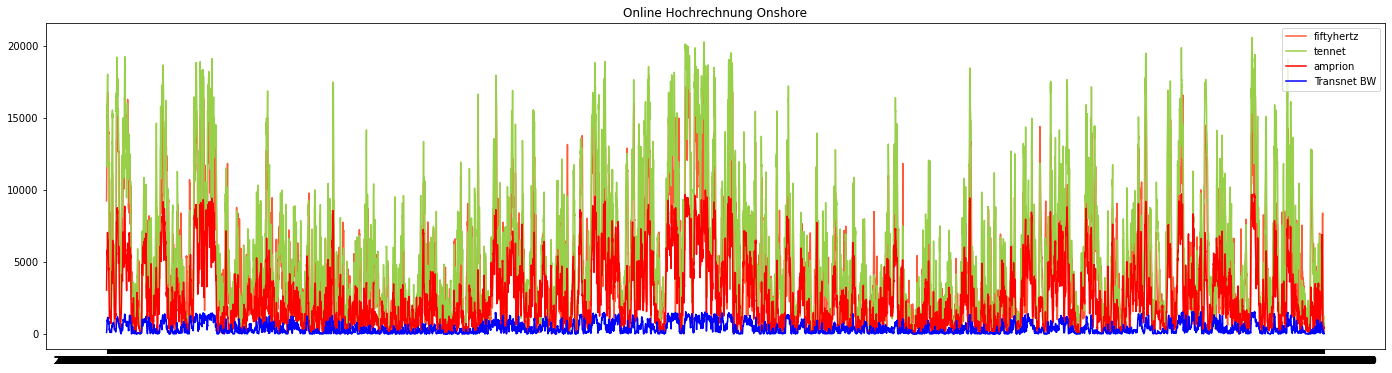

In [50]:
plt.figure(figsize=(24,6))
plt.plot(ohr_won['fiftyhertz'], color='#FF5A36', label='fiftyhertz')
plt.plot(ohr_won['tennet'], color='#99D04A',label='tennet')
plt.plot(ohr_won['amprion'], color='red',label='amprion')
plt.plot(ohr_won['transnetbw'], color='blue',label='Transnet BW')

plt.title('Online Hochrechnung Onshore')
plt.legend(loc='best') 

---

## __Regelleistung agg. results__

In [ ]:
sns.pairplot(regel_results)

---

## __Regelleistung Demand__

In [ ]:
sns.pairplot(regel_demand)

In [ ]:
#plt.figure(figsize=(20,8))
decomposition = seasonal_decompose(x=regel_demand['germany_block_demand_mw'], 
                                   model='additive',
                                   period=30)


decomposition.observed.plot(c='black')

---

# __Imbalance Price to other features__

### __Preparing the dataset__

In [53]:
all.head()

,dt_start_utc,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
0,2019-01-01 00:00:00,13.7925,10.07,0.0,0.0,0.0,0.0,0.0,29.73,6150.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
1,2019-01-01 01:00:00,14.3600,-4.08,0.0,0.0,0.0,0.0,0.0,26.05,6029.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2,2019-01-01 02:00:00,15.0180,-9.91,0.0,0.0,0.0,0.0,0.0,23.76,6057.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
3,2019-01-01 03:00:00,14.8220,-7.41,0.0,0.0,0.0,0.0,0.0,20.95,6122.5,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
4,2019-01-01 04:00:00,14.5930,-12.55,0.0,0.0,0.0,0.0,0.0,15.77,6152.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150


In [54]:
all['dt_start_utc']=pd.to_datetime(all['dt_start_utc'])

In [56]:
all=all.set_index(all['dt_start_utc'])

In [57]:
all.head()

,dt_start_utc,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,13.7925,10.07,0.0,0.0,0.0,0.0,0.0,29.73,6150.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
2019-01-01 01:00:00,2019-01-01 01:00:00,14.3600,-4.08,0.0,0.0,0.0,0.0,0.0,26.05,6029.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2019-01-01 02:00:00,2019-01-01 02:00:00,15.0180,-9.91,0.0,0.0,0.0,0.0,0.0,23.76,6057.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
2019-01-01 03:00:00,2019-01-01 03:00:00,14.8220,-7.41,0.0,0.0,0.0,0.0,0.0,20.95,6122.5,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
2019-01-01 04:00:00,2019-01-01 04:00:00,14.5930,-12.55,0.0,0.0,0.0,0.0,0.0,15.77,6152.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150


In [59]:
all.drop(['dt_start_utc'], axis=1, inplace=True)

In [60]:
all.head()

,windspeed_ms,epex_da_de_eur_mwh,solar_mw_fiftyhertz,solar_mw_tennet,solar_mw_amprion,solar_mw_transnetbw,solar_mw_nrv,fc_da,fc_load_50H,fc_load_DE,...,fc_onshore_DK1,offshore_mw_fiftyhertz,offshore_mw_tennet,offshore_mw_nrv,onshore_mw_fiftyhertz,onshore_mw_tennet,onshore_mw_amprion,onshore_mw_transnetbw,onshore_mw_nrv,imbalance_price_target
dt_start_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,13.7925,10.07,0.0,0.0,0.0,0.0,0.0,29.73,6150.5,41218.5,...,2342.0,1014.99,4669.35,5684.34,9231.31,11624.89,3039.50,105.45,24001.15,-329.6045
2019-01-01 01:00:00,14.3600,-4.08,0.0,0.0,0.0,0.0,0.0,26.05,6029.0,40139.0,...,2227.0,659.54,4674.65,5334.19,10012.16,12762.32,3576.50,112.04,26463.02,-283.8000
2019-01-01 02:00:00,15.0180,-9.91,0.0,0.0,0.0,0.0,0.0,23.76,6057.0,39917.0,...,2163.0,615.41,4663.13,5278.54,10852.08,13988.91,4094.75,164.29,29100.03,-334.7170
2019-01-01 03:00:00,14.8220,-7.41,0.0,0.0,0.0,0.0,0.0,20.95,6122.5,40282.0,...,2108.0,493.95,4666.95,5160.90,11761.89,14809.73,4685.25,226.52,31483.39,117.6665
2019-01-01 04:00:00,14.5930,-12.55,0.0,0.0,0.0,0.0,0.0,15.77,6152.0,40528.0,...,2142.0,333.78,4668.18,5001.96,13125.93,15131.73,5024.50,315.82,33597.98,-323.3150


In [ ]:
all.columns

Index(['windspeed_ms', 'epex_da_de_eur_mwh', 'solar_mw_fiftyhertz',
       'solar_mw_tennet', 'solar_mw_amprion', 'solar_mw_transnetbw',
       'solar_mw_nrv', 'fc_da', 'fc_load_50H', 'fc_load_DE', 'fc_load_DK',
       'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H', 'fc_solar_DE',
       'fc_solar_DK', 'fc_solar_DK1', 'fc_solar_TTG', 'fc_offshore_DE',
       'fc_offshore_DK', 'fc_offshore_DK1', 'fc_offshore_TTG',
       'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK', 'fc_onshore_DK1',
       'offshore_mw_fiftyhertz', 'offshore_mw_tennet', 'offshore_mw_nrv',
       'onshore_mw_fiftyhertz', 'onshore_mw_tennet', 'onshore_mw_amprion',
       'onshore_mw_transnetbw', 'onshore_mw_nrv', 'imbalance_price_target'],
      dtype='object')

---

### __Windspeed in the timestamp__

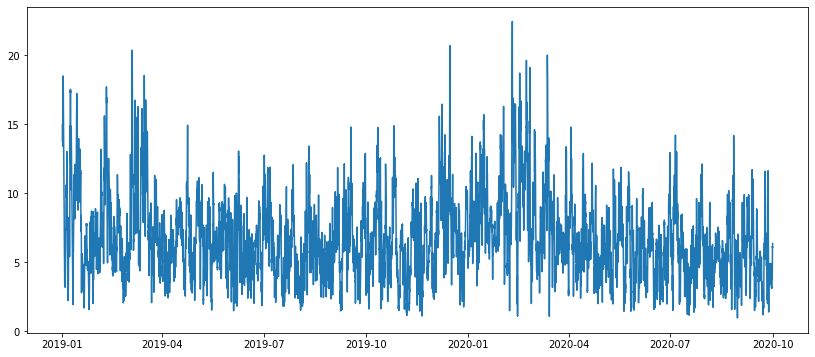

In [61]:
plt.figure(figsize=(14,6))
plt.plot(all['windspeed_ms'])

---

### __Query: December 2019__

In [62]:
all_wind=all.query('dt_start_utc >= "2019-11-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

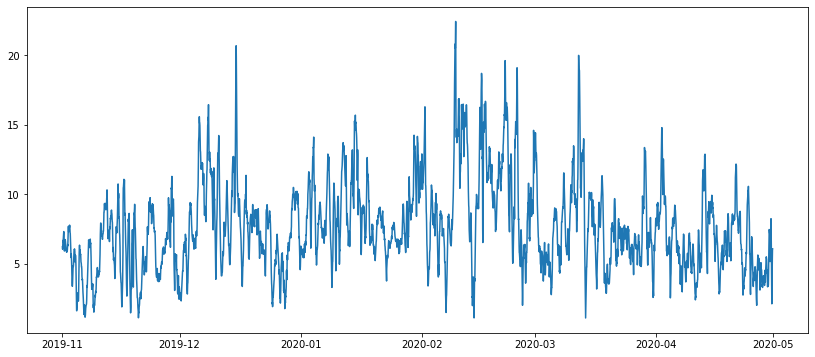

In [63]:
plt.figure(figsize=(14,6))
plt.plot(all_wind['windspeed_ms'])

In [ ]:
wind_dez19=all.query('dt_start_utc >= "2019-12-01 00:00:00" & dt_start_utc < "2020-01-01 00:00:00"')

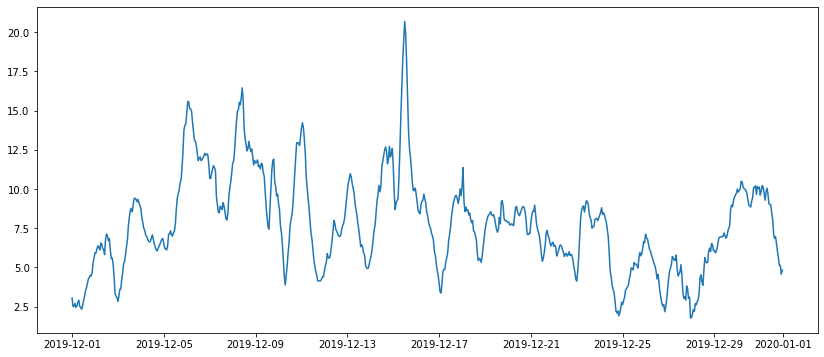

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(wind_dez19['windspeed_ms'])

In [77]:
all_imbalance=all.query('dt_start_utc >= "2019-11-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

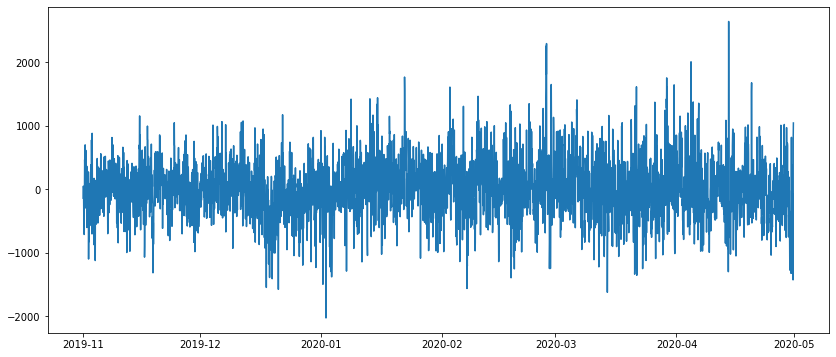

In [78]:
plt.figure(figsize=(14,6))
plt.plot(all_imbalance['imbalance_price_target'])

In [ ]:
all_dez19=all.query('dt_start_utc >= "2019-12-01 00:00:00" & dt_start_utc < "2020-01-01 00:00:00"')

In [ ]:
wind_dez19=all.query('dt_start_utc >= "2019-12-01 00:00:00" & dt_start_utc < "2020-01-01 00:00:00"')

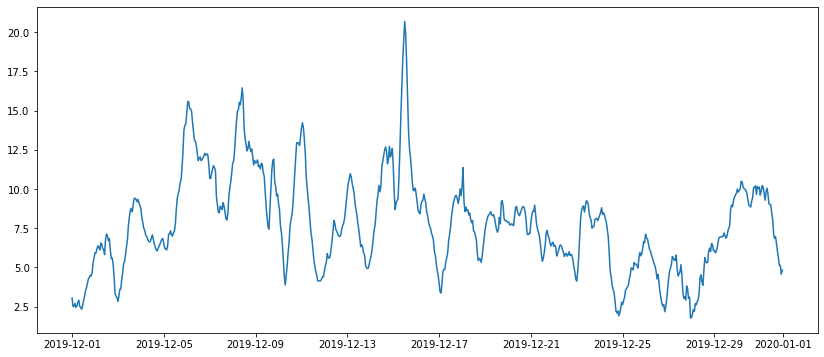

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(wind_dez19['windspeed_ms'])

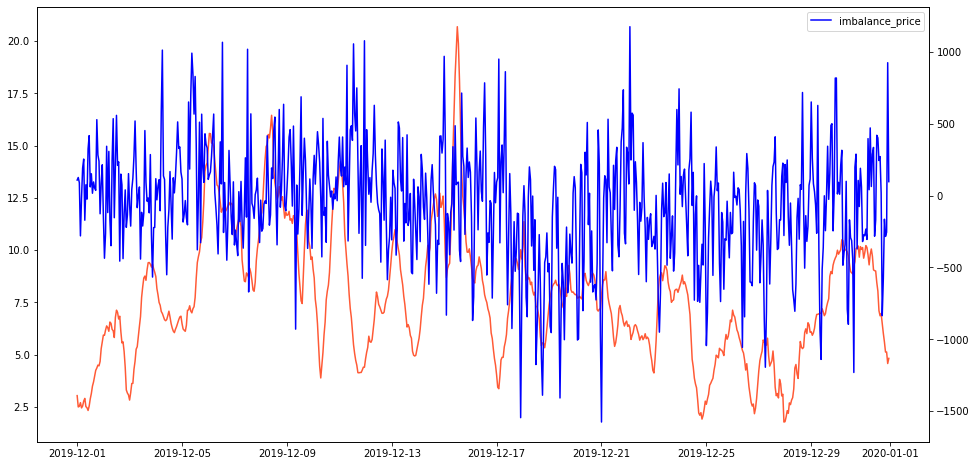

In [105]:
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(wind_dez19['windspeed_ms'], color='#FF5A36', label='windspeed_ms')
ax2=ax.twinx()
ax2.plot(all_dez19['imbalance_price_target'], color='blue',label='imbalance_price')
plt.legend(loc='best')

---

### __Query: February and March 2020__

In [66]:
wind_febmar20=all.query('dt_start_utc >= "2020-02-01 00:00:00" & dt_start_utc < "2020-04-01 00:00:00"')

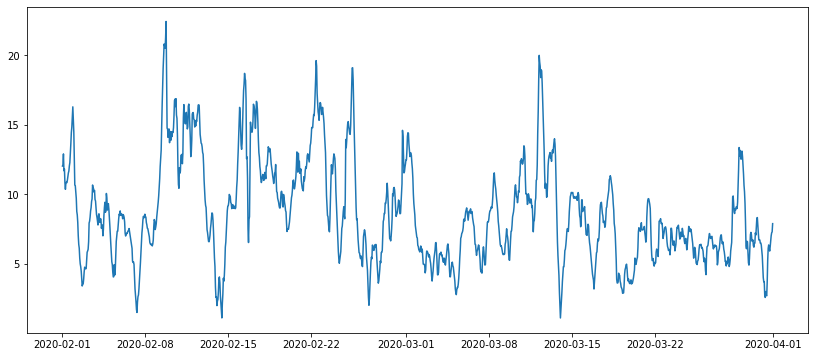

In [67]:
plt.figure(figsize=(14,6))
plt.plot(wind_febmar20['windspeed_ms'])

In [70]:
all_febmar20=all.query('dt_start_utc >= "2020-02-01 00:00:00" & dt_start_utc < "2020-04-01 00:00:00"')

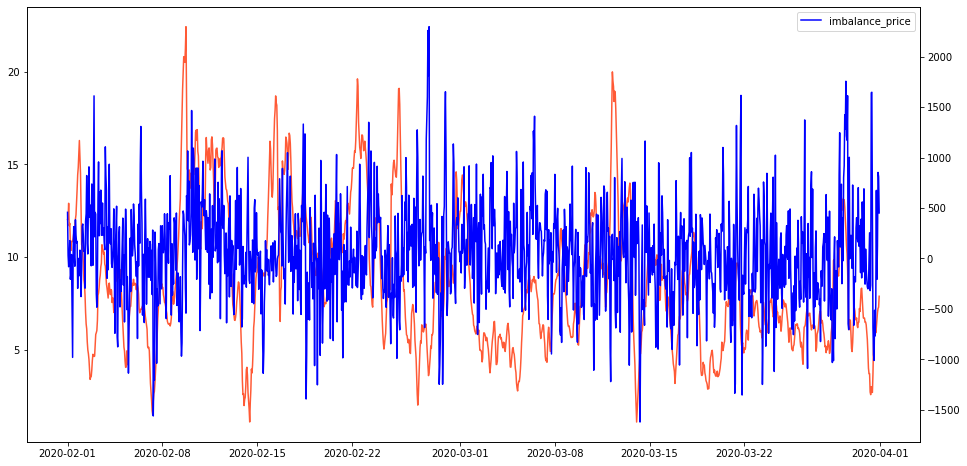

In [107]:
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(wind_febmar20['windspeed_ms'], color='#FF5A36', label='windspeed_ms')
ax2=ax.twinx()
ax2.plot(all_febmar20['imbalance_price_target'], color='blue',label='imbalance_price')
plt.legend(loc='best')

---

### __Query: April 2020__

In [ ]:
imbalance_april20=all.query('dt_start_utc >= "2020-04-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

In [ ]:
windspeed_april20=all.query('dt_start_utc >= "2020-04-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

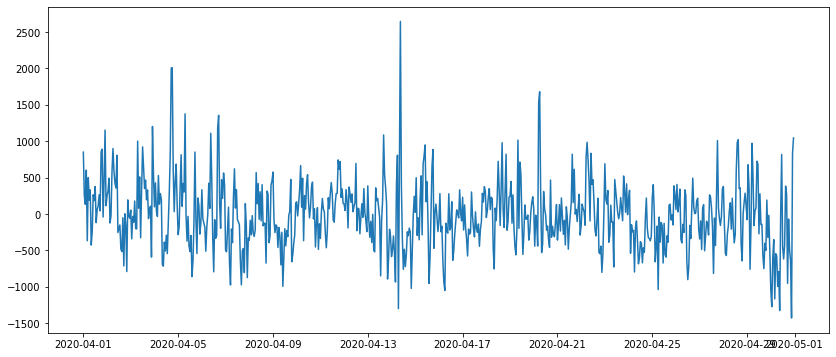

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(imbalance_april20['imbalance_price_target'])

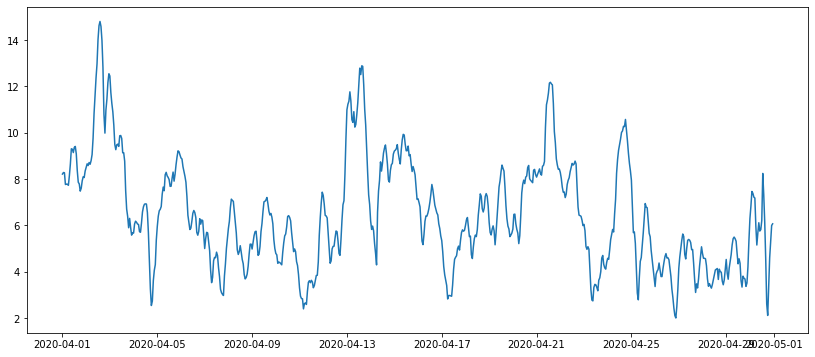

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(windspeed_april20['windspeed_ms'])

---

### __Solar to imbalance price__

In [ ]:
solar=pd.read_csv('../data/onlinehochrechnung_solar_mw.csv')

In [ ]:
solar=all.query('dt_start_utc >= "2019-11-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

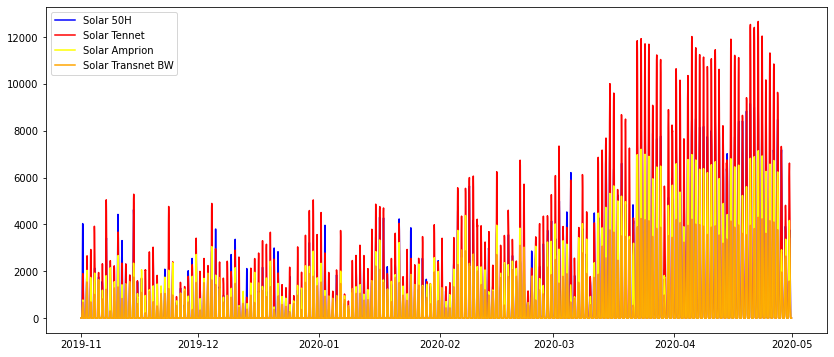

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(solar['solar_mw_fiftyhertz'],color='blue',label='Solar 50H')
plt.plot(solar['solar_mw_tennet'], color='red',label='Solar Tennet')
plt.plot(solar['solar_mw_amprion'], color='yellow', label='Solar Amprion')
plt.plot(solar['solar_mw_transnetbw'], color='orange', label='Solar Transnet BW')
#plt.plot(solar['solar_mw_nrv'], color='black', label='Solar NRV')
plt.legend(loc='best')

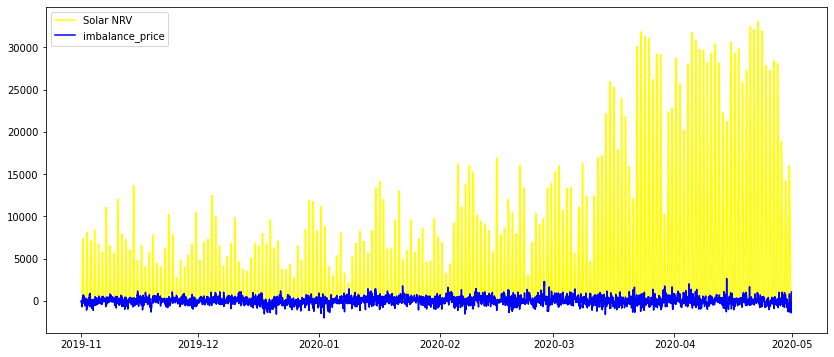

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(solar['solar_mw_nrv'], color='yellow', label='Solar NRV')
plt.plot(all_imbalance['imbalance_price_target'], color='blue',label='imbalance_price')
plt.legend(loc='best')

In [90]:
solar_april20=all.query('dt_start_utc >= "2020-04-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

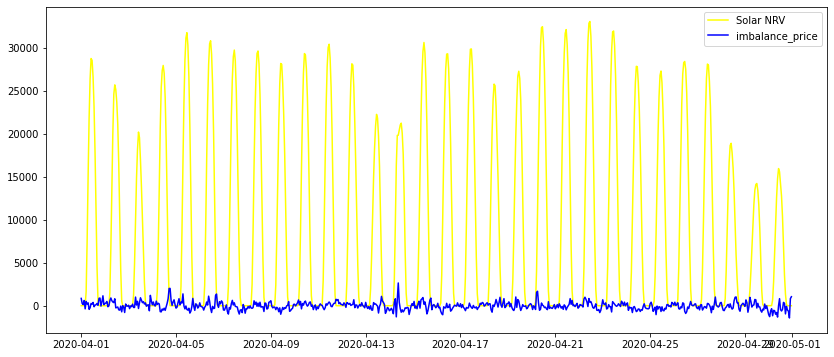

In [92]:
plt.figure(figsize=(14,6))
plt.plot(solar_april20['solar_mw_nrv'], color='yellow', label='Solar NRV')
plt.plot(imbalance_april20['imbalance_price_target'], color='blue',label='imbalance_price')
plt.legend(loc='best')

In [93]:
all.columns

Index(['windspeed_ms', 'epex_da_de_eur_mwh', 'solar_mw_fiftyhertz',
       'solar_mw_tennet', 'solar_mw_amprion', 'solar_mw_transnetbw',
       'solar_mw_nrv', 'fc_da', 'fc_load_50H', 'fc_load_DE', 'fc_load_DK',
       'fc_load_DK1', 'fc_load_TTG', 'fc_solar_50H', 'fc_solar_DE',
       'fc_solar_DK', 'fc_solar_DK1', 'fc_solar_TTG', 'fc_offshore_DE',
       'fc_offshore_DK', 'fc_offshore_DK1', 'fc_offshore_TTG',
       'fc_onshore_50H', 'fc_onshore_DE', 'fc_onshore_DK', 'fc_onshore_DK1',
       'offshore_mw_fiftyhertz', 'offshore_mw_tennet', 'offshore_mw_nrv',
       'onshore_mw_fiftyhertz', 'onshore_mw_tennet', 'onshore_mw_amprion',
       'onshore_mw_transnetbw', 'onshore_mw_nrv', 'imbalance_price_target'],
      dtype='object')

In [94]:
fc_solar_april20=all.query('dt_start_utc >= "2020-04-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

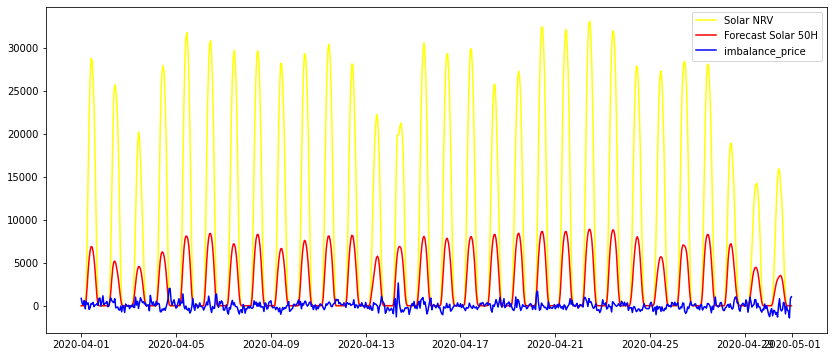

In [95]:
plt.figure(figsize=(14,6))
plt.plot(solar_april20['solar_mw_nrv'], color='yellow', label='Solar NRV')
plt.plot(fc_solar_april20['fc_solar_50H'], color='red',label='Forecast Solar 50H')
plt.plot(imbalance_april20['imbalance_price_target'], color='blue',label='imbalance_price')
plt.legend(loc='best')

In [97]:
fc_solarDE_april20=all.query('dt_start_utc >= "2020-04-01 00:00:00" & dt_start_utc < "2020-05-01 00:00:00"')

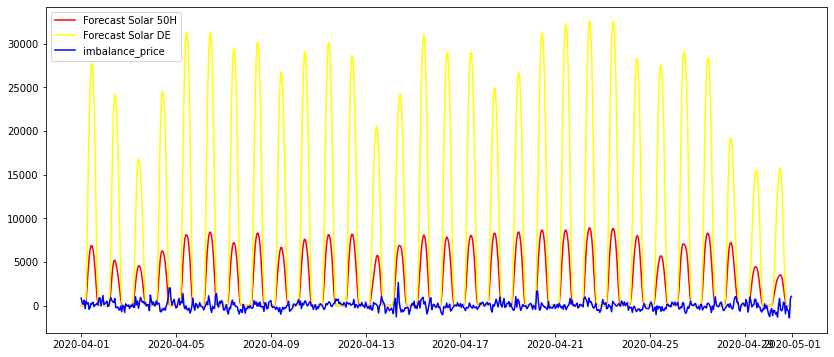

In [98]:
plt.figure(figsize=(14,6))
plt.plot(fc_solar_april20['fc_solar_50H'], color='red',label='Forecast Solar 50H')
plt.plot(fc_solarDE_april20['fc_solar_DE'], color='yellow',label='Forecast Solar DE')
plt.plot(imbalance_april20['imbalance_price_target'], color='blue',label='imbalance_price')
plt.legend(loc='best')

---

### __Decomposition: trend, seasonality, residue__

<AxesSubplot:xlabel='dt_start_utc'>

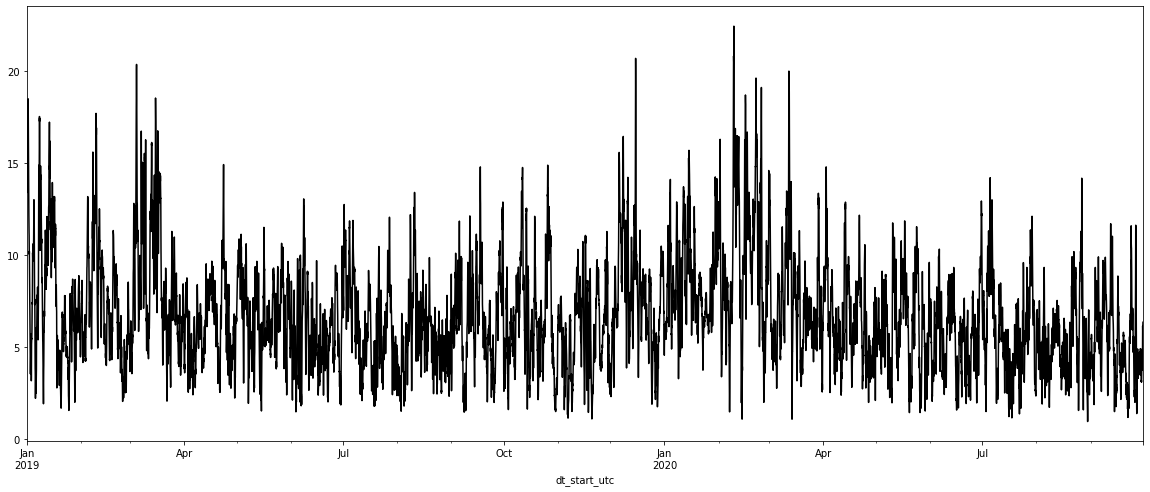

In [88]:
# Check decomposition of trend, seasonality and residue of original time series
plt.figure(figsize=(20,8))
decomposition = seasonal_decompose(x=wind['windspeed_ms'], 
                                   model='additive',
                                   period=30)


decomposition.observed.plot(c='black')


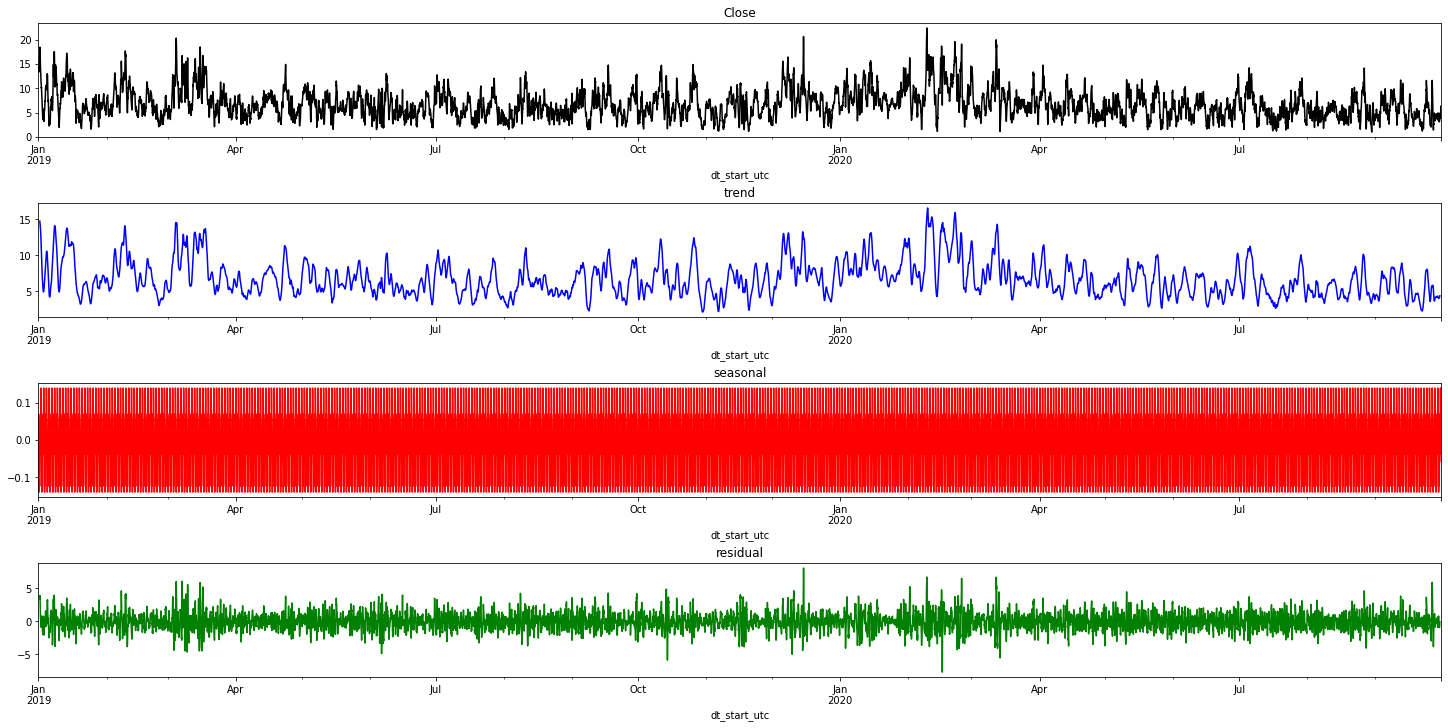

In [89]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition = seasonal_decompose(x=wind['windspeed_ms'], 
                                   model='additive',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c='black', ax=ax[0])
ax[0].set(title='Close')
decomposition.trend.plot(c='blue', ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c='red', ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c='green', ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);